**IMPORTING LIBRARIES**

In [1]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import nltk
import sklearn
import seaborn as sns


In [2]:
mail = pd.read_csv('spam.csv', encoding='utf-8', encoding_errors='ignore')

**Getting familiar with the data**

In [3]:
mail.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
mail.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1392,ham,"Thk shld b can... Ya, i wana go 4 lessons... H...",NaN,NaN,NaN
1197,ham,He also knows about lunch menu only da. . I know,NaN,NaN,NaN
1857,ham,I hate when she does this. She turns what shou...,NaN,NaN,NaN
4307,ham,Ha ha - had popped down to the loo when you he...,NaN,NaN,NaN
3384,ham,Ok can...,NaN,NaN,NaN


In [5]:
mail.size

27860

In [6]:
mail.shape

(5572, 5)

In [7]:
mail

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will _ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
mail.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will _ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [9]:
mail.iloc[5570]['v2']

"The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"

**Data Cleaning**

In [10]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
mail.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [12]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
mail.rename(columns={'v1':'Target','v2':'text mails'}, inplace=True)

In [14]:
mail.sample(5)

,Target,text mails
3006,ham,Ah you see. You have to be in the lingo. I wil...
816,ham,"He has lots of used ones babe, but the model d..."
3596,spam,Congratulations YOU'VE Won. You're a Winner in...
4787,ham,Thanx. Yup we coming back on sun. Finish dinne...
5458,ham,"Sorry, I'll call later"


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder=LabelEncoder()

In [17]:
mail['Target']=encoder.fit_transform(mail['Target'])

In [18]:
mail


,Target,text mails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will _ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [19]:
mail.isnull()

,Target,text mails
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [20]:
mail.isnull().sum()


Target        0
text mails    0
dtype: int64

In [21]:
mail.describe()

,Target
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [22]:
mail.duplicated().sum()

404

In [23]:
mail = mail.drop_duplicates(keep='first')

**EDA**

In [24]:
mail.head()

,Target,text mails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
mail['Target'].value_counts()

Target
0    4516
1     652
Name: count, dtype: int64

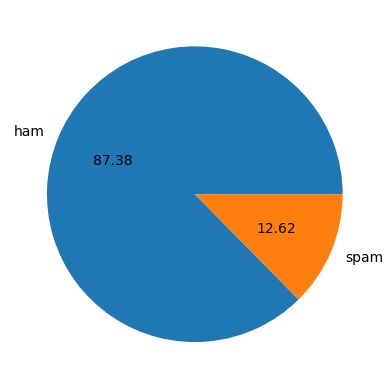

In [26]:
plt.pie(mail['Target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SAC
[nltk_data]     IQD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
mail['num_characters'] = mail['text mails'].apply(len)

C:\Users\SAC IQD\AppData\Local\Temp\ipykernel_17812\1133646959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail['num_characters'] = mail['text mails'].apply(len)


In [29]:
mail

,Target,text mails,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159
5568,0,Will _ b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [30]:
mail['num_words']=mail['text mails'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\SAC IQD\AppData\Local\Temp\ipykernel_17812\649411657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail['num_words']=mail['text mails'].apply(lambda x:len(nltk.word_tokenize(x)))


In [31]:
mail

,Target,text mails,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35
5568,0,Will _ b going to esplanade fr home?,36,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [32]:
mail['num_sentences']=mail['text mails'].apply(lambda x:len(nltk.sent_tokenize(x)))


C:\Users\SAC IQD\AppData\Local\Temp\ipykernel_17812\876505905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail['num_sentences']=mail['text mails'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [33]:
mail

,Target,text mails,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35,4
5568,0,Will _ b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [34]:
mail[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
mail[mail['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108946,1.819973
std,56.328803,13.494730,1.383228
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
mail[mail['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.980061
std,29.937352,7.015283,1.491780
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

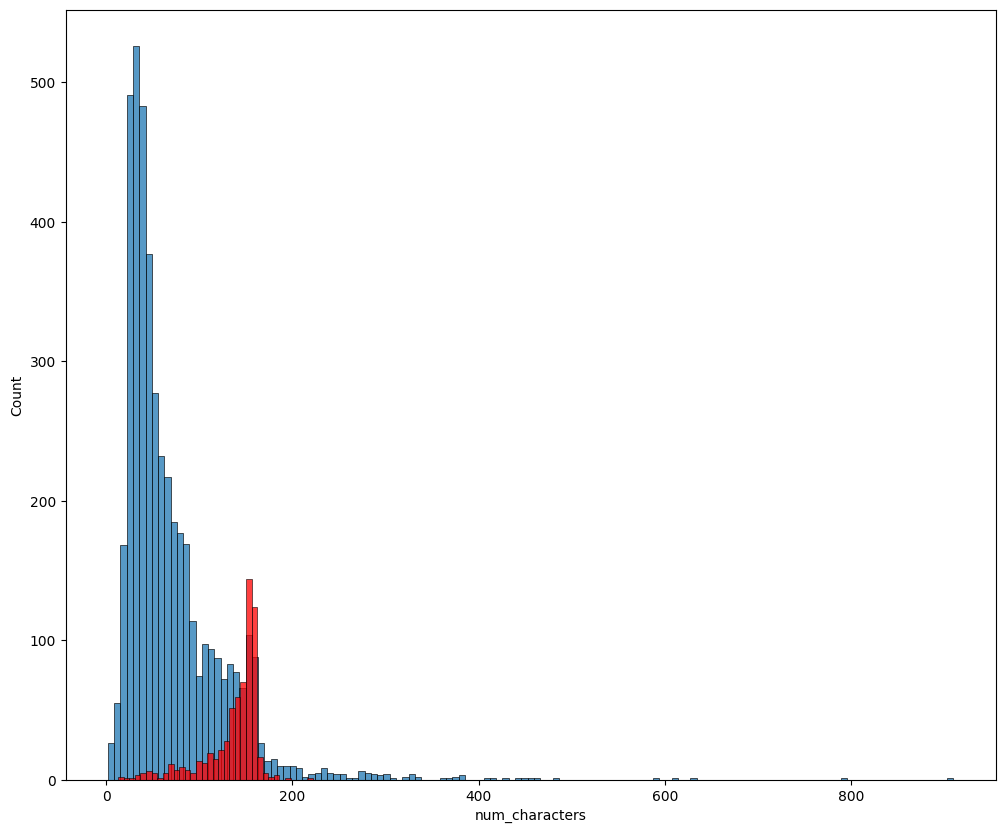

In [38]:
plt.figure(figsize=(12,10))
sns.histplot(mail[mail['Target']==0]['num_characters'])
sns.histplot(mail[mail['Target']==1]['num_characters'],color='red')

C:\Users\SAC IQD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\SAC IQD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\SAC IQD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When gro

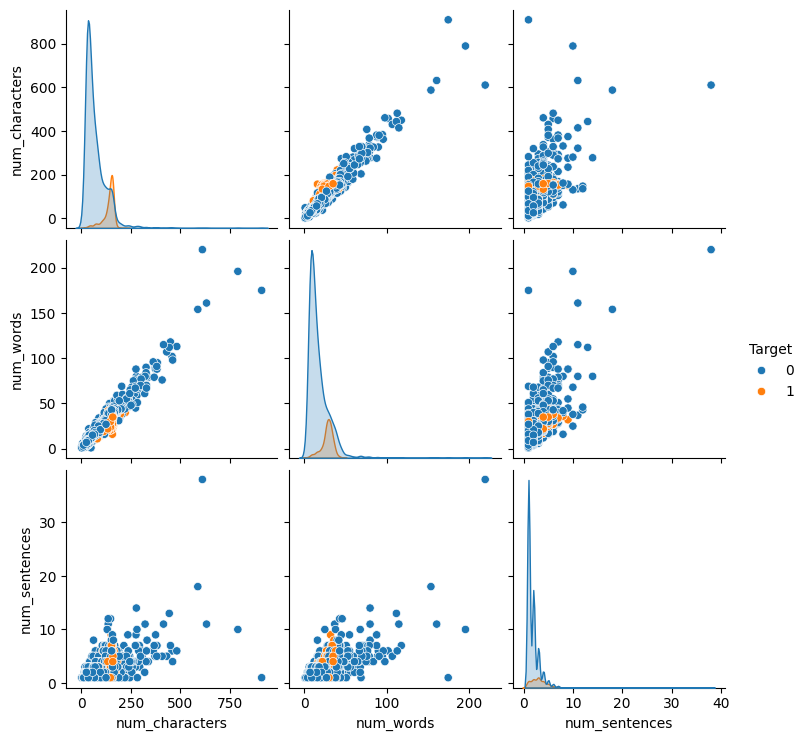

In [39]:
sns.pairplot(mail,hue='Target')

**DATA PREPROCESSING**

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [48]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [41]:
from nltk.corpus import stopwords

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SAC
[nltk_data]     IQD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
import string

In [45]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
transform_text('hey you like my presentation on speaking parrot')

'hey like present speak parrot'

In [51]:
mail['transformed_text']= mail['text mails'].apply(transform_text)

C:\Users\SAC IQD\AppData\Local\Temp\ipykernel_17812\2237736751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail['transformed_text']= mail['text mails'].apply(transform_text)


In [52]:
mail.head()

,Target,text mails,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
from wordcloud import WordCloud

In [62]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [63]:
spam_wc = wc.generate(mail[mail['Target']==1]['transformed_text'].str.cat(sep=' '))

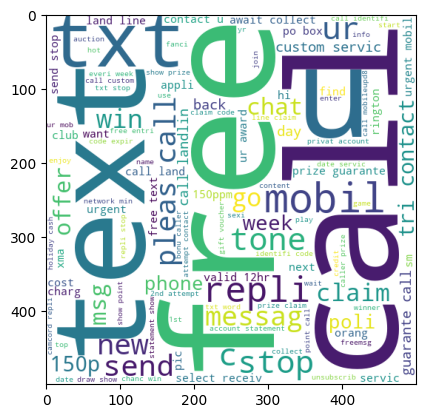

In [64]:
plt.imshow(spam_wc)

In [65]:
ham_wc = wc.generate(mail[mail['Target']==0]['transformed_text'].str.cat(sep=' '))

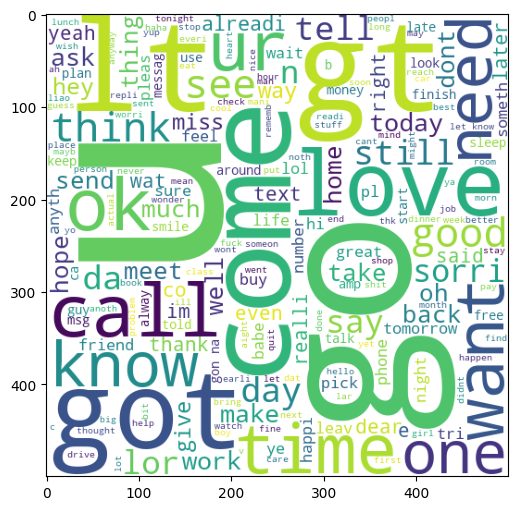

In [66]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [68]:
spam_corpus=[]
for msg in mail[mail['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [69]:
len(spam_corpus)

10106

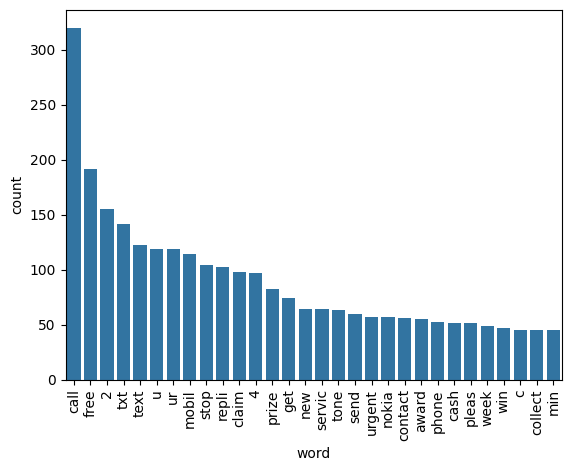

In [79]:
from collections import Counter
spam_counter = Counter(spam_corpus)
most_common_spam = spam_counter.most_common(30)
df_most_common_spam = pd.DataFrame(most_common_spam, columns=['word', 'count'])

# Plot using seaborn
sns.barplot(x='word', y='count', data=df_most_common_spam)
plt.xticks(rotation='vertical')
plt.show()

In [83]:
ham_corpus = []
for msg in mail[mail['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [84]:
len(ham_corpus)

35380

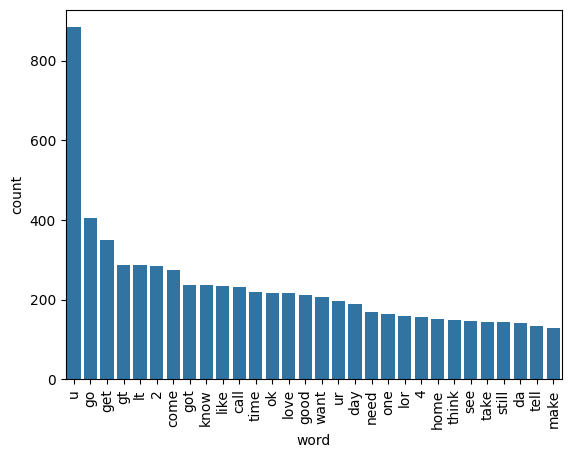

In [86]:
from collections import Counter
ham_counter = Counter(ham_corpus)
most_common_ham = ham_counter.most_common(30)
df_most_common_ham = pd.DataFrame(most_common_ham, columns=['word', 'count'])

# Plot using seaborn
sns.barplot(x='word', y='count', data=df_most_common_ham)
plt.xticks(rotation='vertical')
plt.show()

**MODEL BUILDING**

In [126]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


In [137]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [138]:
X=tfidf.fit_transform(mail['transformed_text']).toarray()

In [ ]:
X.shape

(5168, 6704)

In [ ]:
y=mail['Target'].values

In [112]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [129]:
from sklearn.model_selection import train_test_split

In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [131]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [140]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [141]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8752417794970987
[[791 102]
 [ 27 114]]
0.5277777777777778


In [142]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   0]
 [ 31 110]]
1.0


In [143]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[892   1]
 [ 20 121]]
0.9918032786885246


In [136]:
#tfidf --> mnb

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [146]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [147]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [148]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [149]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9834710743801653
For  KN
Accuracy -  0.9013539651837524
Precision -  1.0
For  NB
Accuracy -  0.9700193423597679
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8695652173913043
For  LR
Accuracy -  0.9555125725338491
Precision -  0.9611650485436893
For  RF
Accuracy -  0.9671179883945842
Precision -  0.9908256880733946


C:\Users\SAC IQD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.960348162475822
Precision -  0.8787878787878788
For  ETC
Accuracy -  0.971953578336557
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9458413926499033
Precision -  0.9381443298969072
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9655172413793104


In [150]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [151]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.901354,1.000000
2,NB,0.970019,1.000000
5,RF,0.967118,0.990826
0,SVC,0.976789,0.983471
8,ETC,0.971954,0.974576
10,xgb,0.968085,0.965517
4,LR,0.955513,0.961165
6,AdaBoost,0.960348,0.946429
9,GBDT,0.945841,0.938144
7,BgC,0.960348,0.878788


In [152]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [153]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.901354
1,NB,Accuracy,0.970019
2,RF,Accuracy,0.967118
3,SVC,Accuracy,0.976789
4,ETC,Accuracy,0.971954
5,xgb,Accuracy,0.968085
6,LR,Accuracy,0.955513
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.945841
9,BgC,Accuracy,0.960348


C:\Users\SAC IQD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\SAC IQD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


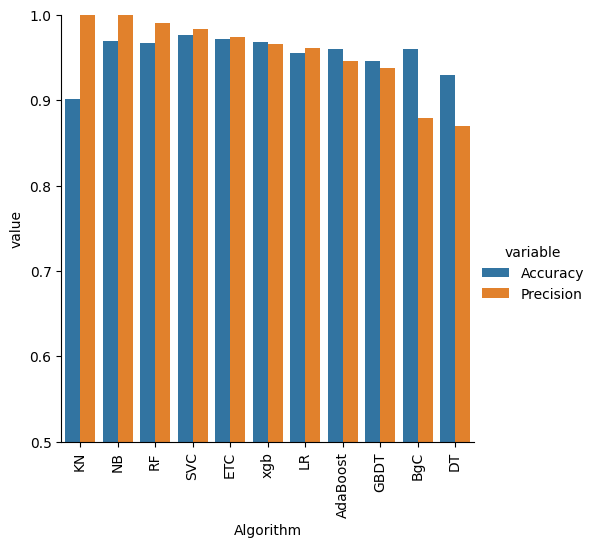

In [154]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [161]:
df2=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'precision_scaling':precision_scores}).sort_values('precision_scaling',ascending=False)

In [162]:
df2.head()

,Algorithm,Accuracy_scaling,precision_scaling
1,KN,0.901354,1.000000
2,NB,0.970019,1.000000
5,RF,0.967118,0.990826
0,SVC,0.976789,0.983471
8,ETC,0.971954,0.974576


In [165]:
df2

,Algorithm,Accuracy_scaling,precision_scaling
1,KN,0.901354,1.000000
2,NB,0.970019,1.000000
5,RF,0.967118,0.990826
0,SVC,0.976789,0.983471
8,ETC,0.971954,0.974576
10,xgb,0.968085,0.965517
4,LR,0.955513,0.961165
6,AdaBoost,0.960348,0.946429
9,GBDT,0.945841,0.938144
7,BgC,0.960348,0.878788


In [ ]:
#so our best model is naive bayes mnb

**FINAL MODEL (CONCLUSION)**


In [166]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   0]
 [ 31 110]]
1.0
